Conduct an EDA on Video Game Sales to examine the relationships between genre and publishing company, as well as region

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages.

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
#Load Data
df = pd.read_csv('Video_Games_Sales_Cleaned.csv')

In [4]:
#check out appearance of data 
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,8,E
1,1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,8.3,E
2,2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,8,E
3,3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,8.5,E
4,4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,6.6,E


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1373 non-null   int64  
 1   Rank          1373 non-null   int64  
 2   Name          1373 non-null   object 
 3   Platform      1373 non-null   object 
 4   Year          1373 non-null   float64
 5   Genre         1373 non-null   object 
 6   Publisher     1373 non-null   object 
 7   NA_ Sales     1373 non-null   float64
 8   EU_Sales      1373 non-null   float64
 9   JP_Sales      1373 non-null   float64
 10  Other_Sales   1373 non-null   float64
 11  Global_Sales  1373 non-null   float64
 12  Critic_Score  1373 non-null   float64
 13  User_Score    1373 non-null   object 
 14  Rating        1372 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 161.0+ KB


In [6]:
df['User_Score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '7.4', '6.3', '8.2',
       '9', '7.9', '8.7', '7.1', '3.4', '5.3', '8.9', '7.8', '7.5', '2.6',
       '7.2', '7', '7.3', '4.3', '7.6', '9.1', '5.7', '6.5', '5.5', '8.8',
       '6.9', '6.8', '6.1', '4', '8.1', '5', '6.4', '9.3', '6', 'tbd',
       '4.9', '6.7', '9.2', '4.6', '5.9', '5.4', '5.8', '3.9', '5.6',
       '6.2', '2.9', '9.4', '5.2', '4.1', '4.5', '4.8', '3.5', '1.9',
       '3.1', '2.2', '2', '9.5', '5.1', '3.3', '4.4', '2.1'], dtype=object)

In [7]:
df[df['User_Score']=='tbd']

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
198,198,303,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.00,0.54,3.98,61.0,tbd,E10+
422,422,628,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.46,71.0,tbd,E
693,693,1043,Game Party 3,Wii,2009.0,Puzzle,Warner Bros. Interactive Entertainment,1.43,0.16,0.00,0.12,1.71,37.0,tbd,E
701,701,1054,Personal Trainer: Math,DS,2007.0,Puzzle,Nintendo,0.49,1.12,0.00,0.09,1.70,63.0,tbd,E
768,768,1148,SpongeBob's Atlantis SquarePantis,DS,2007.0,Action,THQ,1.50,0.00,0.00,0.11,1.61,64.0,tbd,E
784,784,1173,MySims Kingdom,DS,2008.0,Simulation,Electronic Arts,0.81,0.60,0.01,0.17,1.58,58.0,tbd,E
820,820,1221,MySims Kingdom,Wii,2008.0,Simulation,Electronic Arts,0.71,0.65,0.01,0.17,1.53,58.0,tbd,E
865,865,1303,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,0.72,0.56,0.00,0.19,1.46,76.0,tbd,T
866,866,1304,Wall-E,DS,2008.0,Platform,THQ,0.46,0.83,0.00,0.17,1.46,54.0,tbd,E
951,951,1428,SingStar Abba,PS2,2008.0,Misc,Sony Computer Entertainment,0.23,0.04,0.00,1.09,1.36,64.0,tbd,T


In [8]:
df = df[df['User_Score'] != 'tbd']

In [9]:
df['User_Score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '7.4', '6.3', '8.2',
       '9', '7.9', '8.7', '7.1', '3.4', '5.3', '8.9', '7.8', '7.5', '2.6',
       '7.2', '7', '7.3', '4.3', '7.6', '9.1', '5.7', '6.5', '5.5', '8.8',
       '6.9', '6.8', '6.1', '4', '8.1', '5', '6.4', '9.3', '6', '4.9',
       '6.7', '9.2', '4.6', '5.9', '5.4', '5.8', '3.9', '5.6', '6.2',
       '2.9', '9.4', '5.2', '4.1', '4.5', '4.8', '3.5', '1.9', '3.1',
       '2.2', '2', '9.5', '5.1', '3.3', '4.4', '2.1'], dtype=object)

In [11]:
df["User_Score"] = df.User_Score.astype(float)

C:\Users\snewaz\AppData\Local\Temp\ipykernel_28532\1315392266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["User_Score"] = df.User_Score.astype(float)


In [12]:
df.dtypes

Unnamed: 0        int64
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_ Sales       float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Critic_Score    float64
User_Score      float64
Rating           object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1371
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1351 non-null   int64  
 1   Rank          1351 non-null   int64  
 2   Name          1351 non-null   object 
 3   Platform      1351 non-null   object 
 4   Year          1351 non-null   float64
 5   Genre         1351 non-null   object 
 6   Publisher     1351 non-null   object 
 7   NA_ Sales     1351 non-null   float64
 8   EU_Sales      1351 non-null   float64
 9   JP_Sales      1351 non-null   float64
 10  Other_Sales   1351 non-null   float64
 11  Global_Sales  1351 non-null   float64
 12  Critic_Score  1351 non-null   float64
 13  User_Score    1351 non-null   float64
 14  Rating        1350 non-null   object 
dtypes: float64(8), int64(2), object(5)
memory usage: 168.9+ KB


In [16]:
df.shape

(1351, 15)

Now that I have thoroughly cleaned the data making scores a number, I will use Genre as the first dependent variable for a regression analysis, I will create a histogram for this analysis

<AxesSubplot:>

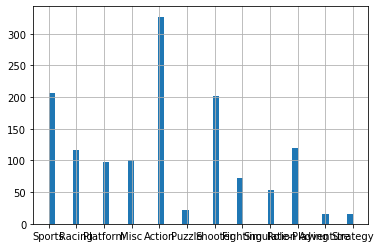

In [19]:
df['Genre'].hist(bins = 50)

In [20]:
df['Genre'].describe()

count       1351
unique        12
top       Action
freq         327
Name: Genre, dtype: object

<AxesSubplot:>

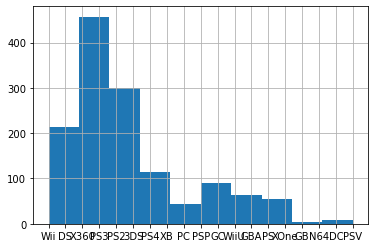

In [26]:
df['Platform'].hist()

In [27]:
df['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'XB', 'PC', 'PSP',
       'GC', 'WiiU', 'GBA', 'PS', 'XOne', 'GB', 'N64', 'DC', 'PSV'],
      dtype=object)

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,8.0,E
1,1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,8.3,E
2,2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,8.0,E
3,3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,8.5,E
4,4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,6.6,E
5,5,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,87.0,8.4,E
6,6,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,91.0,8.6,E
7,7,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,80.0,7.7,E
8,8,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,80.0,7.4,E
9,9,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,61.0,6.3,E
